# Visualize the Dataset
Link to dataset https://www.energidataservice.dk/tso-electricity/consumptionindustry
Parameters 
Industry Groups == Privat 
Municipality number == 851

## Importing Data

In [2]:
import pandas as pd

# Correct the file path to the actual location of the CSV file
df = pd.read_csv('/Users/casper/Documents/GitHub/p9-energy/Dataset/ConsumptionIndustry.csv', sep=';')

# Load the dataset for colab
#df = pd.read_csv('ConsumptionIndustry.csv', sep=';')


# Convert HourDK to datetime
df['HourDK'] = pd.to_datetime(df['HourDK'])

# Convert ConsumptionkWh to numeric
df['ConsumptionkWh'] = df['ConsumptionkWh'].str.replace(",", ".").astype(float)


print(df.head())
print('\n')
print(df.tail())
print('\n')
print(df.info())
print('\n')

            HourUTC              HourDK  MunicipalityNo Branche  \
0  2021-01-01 00:00 2021-01-01 01:00:00             851  Privat   
1  2021-01-01 01:00 2021-01-01 02:00:00             851  Privat   
2  2021-01-01 02:00 2021-01-01 03:00:00             851  Privat   
3  2021-01-01 03:00 2021-01-01 04:00:00             851  Privat   
4  2021-01-01 04:00 2021-01-01 05:00:00             851  Privat   

   ConsumptionkWh  
0       35086.772  
1       31777.762  
2       28423.659  
3       25675.926  
4       24283.909  


                HourUTC              HourDK  MunicipalityNo Branche  \
33834  2024-11-10 18:00 2024-11-10 19:00:00             851  Privat   
33835  2024-11-10 19:00 2024-11-10 20:00:00             851  Privat   
33836  2024-11-10 20:00 2024-11-10 21:00:00             851  Privat   
33837  2024-11-10 21:00 2024-11-10 22:00:00             851  Privat   
33838  2024-11-10 22:00 2024-11-10 23:00:00             851  Privat   

       ConsumptionkWh  
33834       48584.696  


### Plotting test data

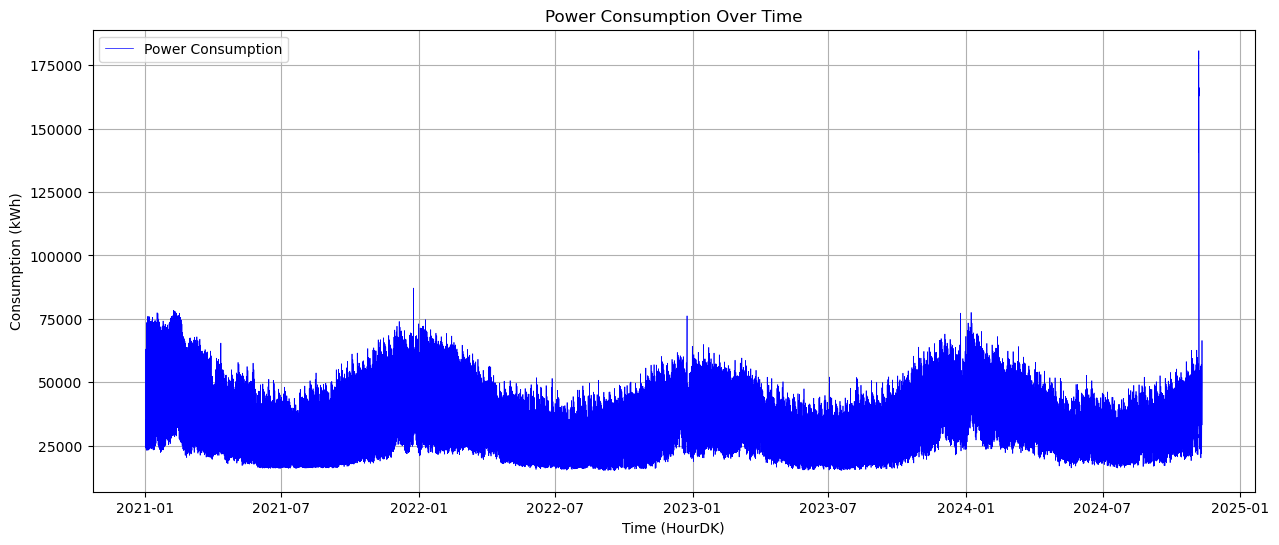

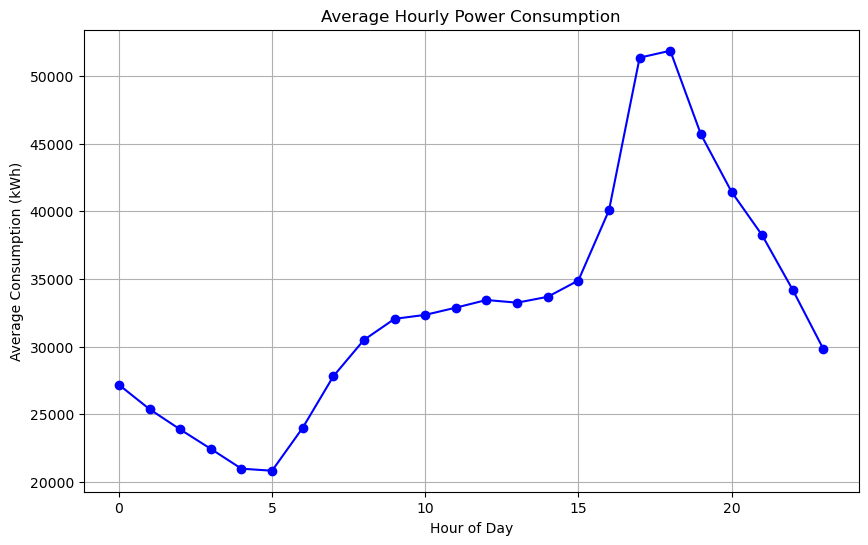

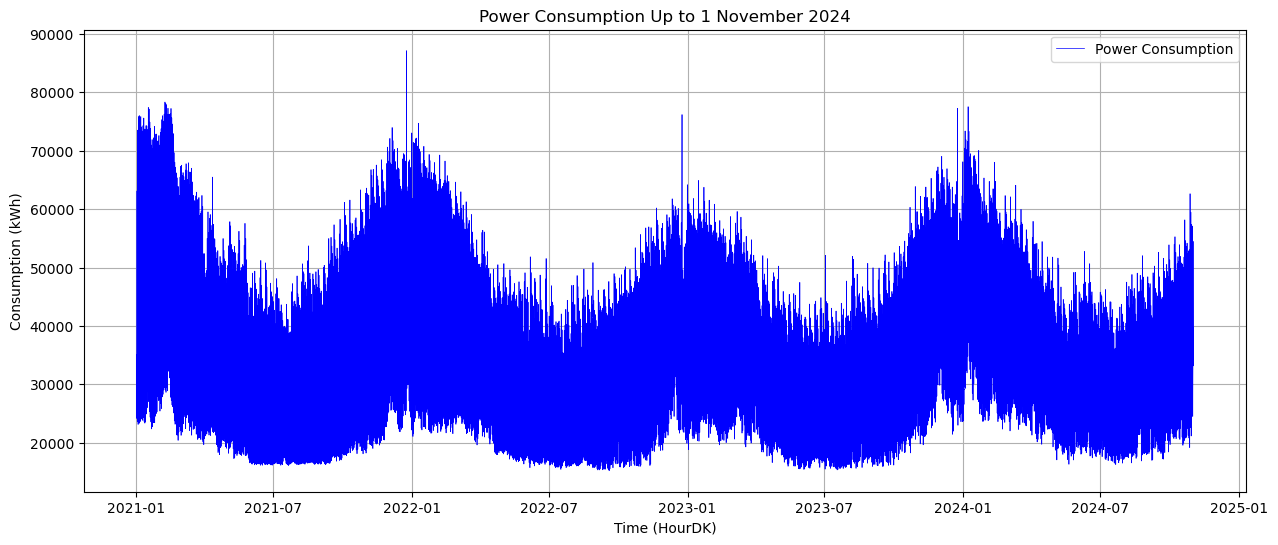

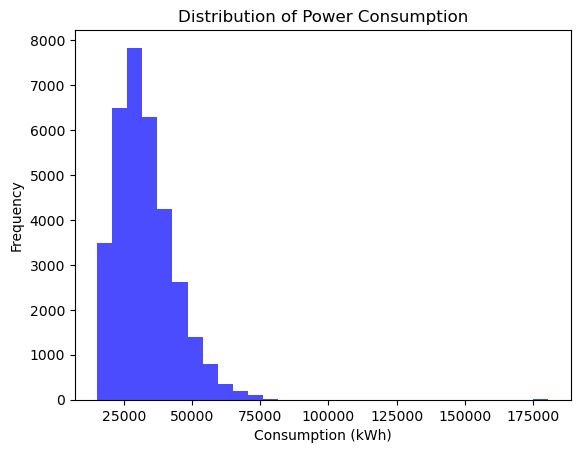

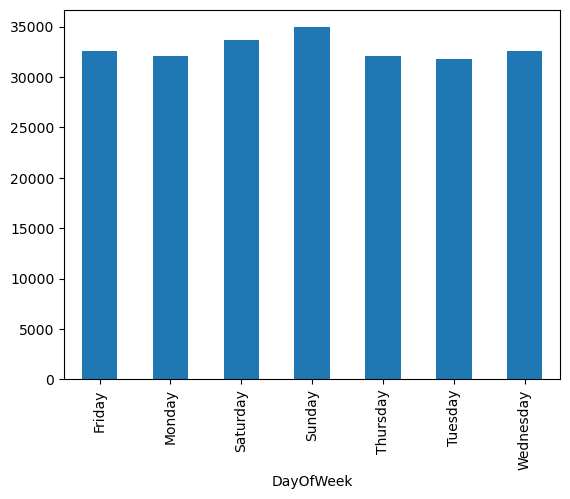

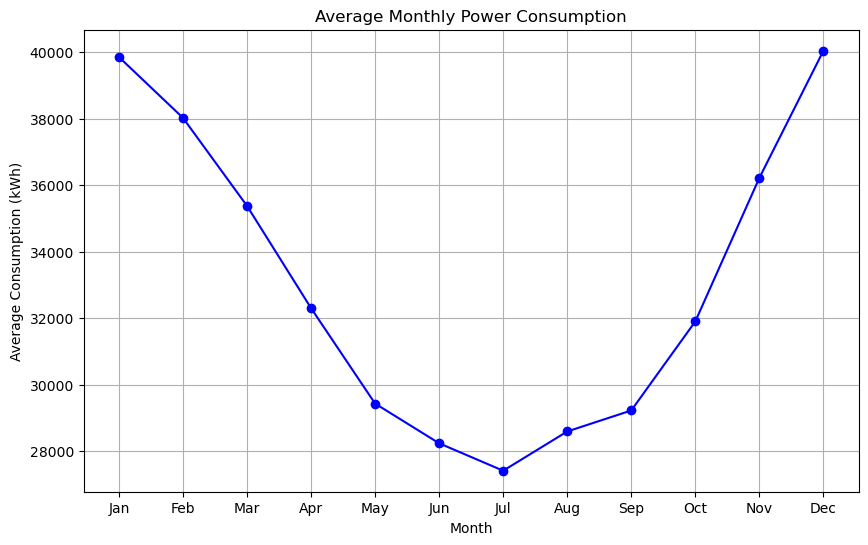

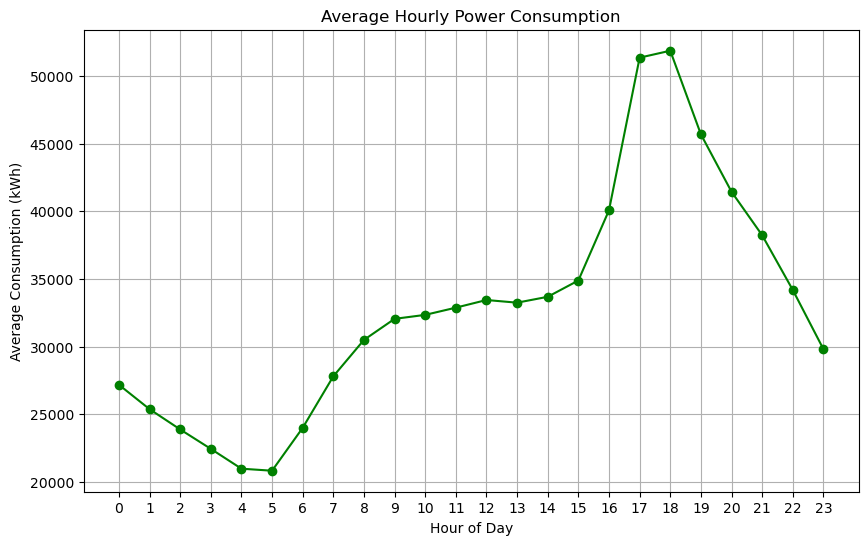

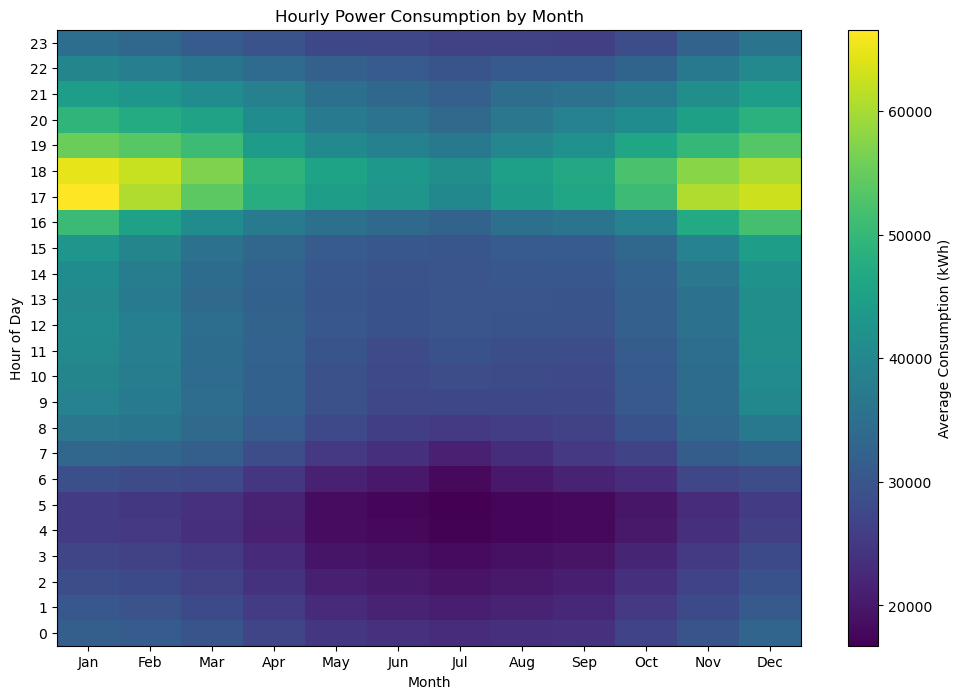

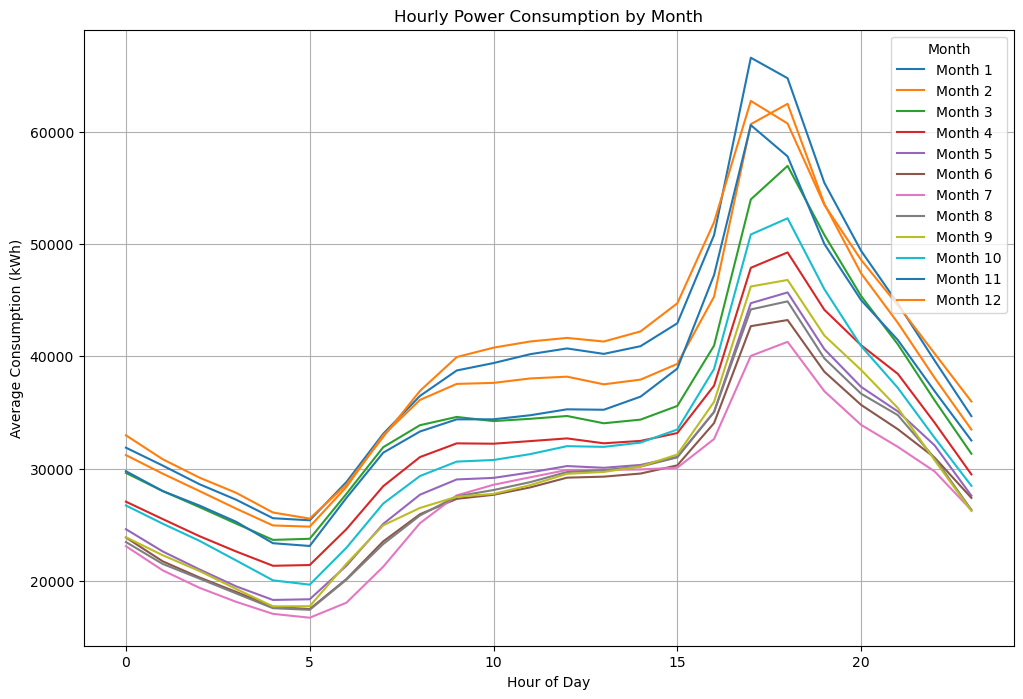

In [3]:
# Convert HourUTC to datetime
from matplotlib import pyplot as plt

# Plot the entire power consumption over time
plt.figure(figsize=(15, 6))
plt.plot(df['HourDK'], df['ConsumptionkWh'],
         label="Power Consumption", color="blue", linewidth=0.5)
plt.title('Power Consumption Over Time')
plt.xlabel('Time (HourDK)')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()


# Example: Average Hourly Consumption
df['Hour'] = df['HourDK'].dt.hour

# Calculate average consumption by hour
hourly_avg = df.groupby('Hour')['ConsumptionkWh'].mean()

# Plot hourly average
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker="o", color="blue")
plt.title('Average Hourly Power Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption (kWh)')
plt.grid(True)
plt.show()

# Using filtering 
# Filter data up to 1 November 2024
end_date = '2024-11-01'
filtered_df = df[df['HourDK'] <= end_date]
plt.figure(figsize=(15, 6))
plt.plot(filtered_df['HourDK'], filtered_df['ConsumptionkWh'],
         label="Power Consumption", color="blue", linewidth=0.5)
plt.title('Power Consumption Up to 1 November 2024')
plt.xlabel('Time (HourDK)')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()

# Distribution Analysis
plt.hist(df['ConsumptionkWh'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Power Consumption')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

# Temporal Patterns
# Weekly Patterns
df['DayOfWeek'] = df['HourDK'].dt.day_name()
weekly_avg = df.groupby('DayOfWeek')['ConsumptionkWh'].mean()
weekly_avg.plot(kind='bar')

# Monthly Patterns
df['Month'] = df['HourDK'].dt.month

# Calculate the average consumption per month
monthly_avg = df.groupby('Month')['ConsumptionkWh'].mean()

# Plot the average consumption by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values,
         marker='o', color='blue', linestyle='-')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])  # Month names
plt.title('Average Monthly Power Consumption')
plt.xlabel('Month')
plt.ylabel('Average Consumption (kWh)')
plt.grid(True)
plt.show()

# Daily Patterns
# Add an Hour column
df['Hour'] = df['HourDK'].dt.hour

# Calculate the average consumption per hour
hourly_avg = df.groupby('Hour')['ConsumptionkWh'].mean()

# Plot the average consumption by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg.values,
         marker='o', color='green', linestyle='-')
plt.xticks(ticks=range(0, 24))  # Hour range
plt.title('Average Hourly Power Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption (kWh)')
plt.grid(True)
plt.show()

# Pivot table for average consumption by month and hour
heatmap_data = df.pivot_table(
    index='Hour', columns='Month', values='ConsumptionkWh', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Average Consumption (kWh)')
plt.title('Hourly Power Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.yticks(ticks=range(24))  # Hour range
plt.show()

# Group by month and hour to calculate averages
monthly_hourly_avg = df.groupby(['Month', 'Hour'])[
    'ConsumptionkWh'].mean().unstack(level=0)

# Plot hourly patterns for each month
plt.figure(figsize=(12, 8))
for month in monthly_hourly_avg.columns:
    plt.plot(monthly_hourly_avg.index,
             monthly_hourly_avg[month], label=f'Month {month}')
plt.title('Hourly Power Consumption by Month')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption (kWh)')
plt.legend(title='Month', loc='upper right')
plt.grid(True)
plt.show()